In [1]:
import tensorflow as tf

In [2]:
tf.config.list_physical_devices('GPU')

[]

In [3]:
import os

In [4]:
#os.path.join('my_data','happy')

## Removing dodgy images

In [5]:
import cv2
import imghdr #Used to check the image extensions

/var/folders/25/4x9h4c254tbcc42r6c_fwtlm0000gn/T/ipykernel_40949/3237424475.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr #Used to check the image extensions


In [6]:
data_dir = 'my_data'

In [7]:
image_exts = ['jpeg','jpg','png','bmp']

In [8]:
os.listdir()

['MoodClassification.ipynb',
 '.DS_Store',
 'my_data',
 'happy_test.jpg',
 'models',
 'README.md',
 'sad_test.jpg',
 'fear_test.jpg',
 '.venv',
 'angry_test.jpg']

In [9]:


# List of acceptable image extensions
image_exts = ['jpg', 'jpeg', 'png', 'bmp', 'tiff', 'gif']

for imageclass in os.listdir('my_data'):
    imageclass_path = os.path.join('my_data', imageclass)
    if os.path.isdir(imageclass_path):  # Ensure it's a directory
        for image in os.listdir(imageclass_path):
            image_path = os.path.join(imageclass_path, image)
            try:
                img = cv2.imread(image_path)
                ext = imghdr.what(image_path)
                if ext not in image_exts:
                    print(f'Removing {image_path} as its extension was {ext}')
                    os.remove(image_path)
            except Exception as e:
                print(f'Issue with {image_path}: {e}')
                os.remove(image_path)

            

libpng warning: iCCP: known incorrect sRGB profile


In [10]:
os.listdir()

['MoodClassification.ipynb',
 '.DS_Store',
 'my_data',
 'happy_test.jpg',
 'models',
 'README.md',
 'sad_test.jpg',
 'fear_test.jpg',
 '.venv',
 'angry_test.jpg']

<class 'numpy.ndarray'>
[[[221 227 226]
  [221 227 226]
  [221 227 226]
  ...
  [238 245 238]
  [238 245 238]
  [238 245 238]]

 [[220 226 225]
  [220 226 225]
  [220 226 225]
  ...
  [238 245 238]
  [238 245 238]
  [238 245 238]]

 [[220 226 225]
  [220 226 225]
  [220 226 225]
  ...
  [237 244 237]
  [237 244 237]
  [237 244 237]]

 ...

 [[ 77  82 115]
  [ 95 100 133]
  [112 122 162]
  ...
  [128 124 119]
  [128 124 119]
  [128 124 119]]

 [[ 91  89 118]
  [ 75  73 102]
  [ 64  68 109]
  ...
  [126 122 117]
  [126 122 117]
  [126 122 117]]

 [[ 96  94 123]
  [ 81  79 108]
  [ 52  56  97]
  ...
  [125 121 116]
  [124 120 115]
  [124 120 115]]]


Matplotlib is building the font cache; this may take a moment.


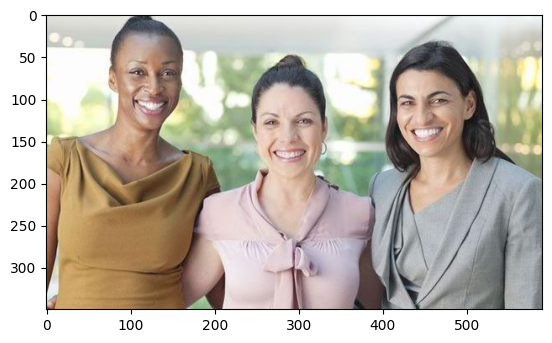

In [12]:
import cv2
img = cv2.imread('my_data/happy/1-2.jpg')
converted_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #converted image
print(type(img))
print(img)
from matplotlib import pyplot as plt
plt.imshow(converted_img) #to display the image
plt.show()

## Load data

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
data = tf.keras.utils.image_dataset_from_directory('my_data') # creates a dataset on its own using the directories with 2 columns ie images as np array and label. It performs internally operations like dividing into batch sizes and resizing etc. Have a look at its documentation by typing tf.keras.utils.image_dataset_from_directory??
#Note that we can change the parameters such as batch size pixels etc by putting the arguments above 
#eg tf.keras.utils.image_dataset_from_directory('my_data',bacth_size = 8, image_size = (128,128))

Found 497 files belonging to 4 classes.


In [16]:
#tf.keras.utils.image_dataset_from_directory??

In [17]:
data[0] #Cant access like this as this dataset is generated on the fly and not prestored in the memory hence we use data.as_numpy_iterator() to access the generator or dataset and we can get consecutive batches using variable_name.next() method

TypeError: '_PrefetchDataset' object is not subscriptable

In [18]:
data_iterator = data.as_numpy_iterator() #becomes a numpy data iterator and now we can use .next() method to have a look at the dataset which is of shape 2 as 2 columns-image and labels 

In [19]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x33bfb1d90>)

In [20]:
batch = data_iterator.next()
batch

2024-07-19 14:21:59.498536: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


(array([[[[193.71875  , 212.125    , 220.90625  ],
          [202.09473  , 217.09473  , 224.09473  ],
          [196.75879  , 212.8125   , 219.8125   ],
          ...,
          [151.14941  , 163.14941  , 175.14941  ],
          [153.45215  , 165.45215  , 177.45215  ],
          [158.60889  , 172.18213  , 182.11426  ]],
 
         [[190.28076  , 210.28076  , 219.28076  ],
          [200.01709  , 215.01709  , 222.01709  ],
          [194.39307  , 213.04443  , 220.21875  ],
          ...,
          [152.625    , 164.1875   , 176.1875   ],
          [156.27979  , 167.87646  , 179.87646  ],
          [161.36084  , 175.36084  , 184.36084  ]],
 
         [[188.75879  , 208.75879  , 215.82129  ],
          [193.89307  , 212.89307  , 219.89307  ],
          [193.0249   , 212.0249   , 219.0249   ],
          ...,
          [159.40625  , 169.40625  , 181.40625  ],
          [161.84863  , 173.84863  , 185.84863  ],
          [162.3169   , 176.3169   , 187.27686  ]],
 
         ...,
 
         [[ 

In [21]:
batch[0].shape #Images of 32 batch size and 256 by256 px and 3 colour channels 

(32, 256, 256, 3)

In [22]:
batch[1] #32 labels for the batch of 32 images

array([3, 2, 0, 1, 0, 0, 1, 2, 3, 3, 0, 0, 3, 3, 2, 2, 3, 3, 2, 1, 0, 1,
       3, 1, 2, 2, 3, 1, 0, 2, 3, 1], dtype=int32)

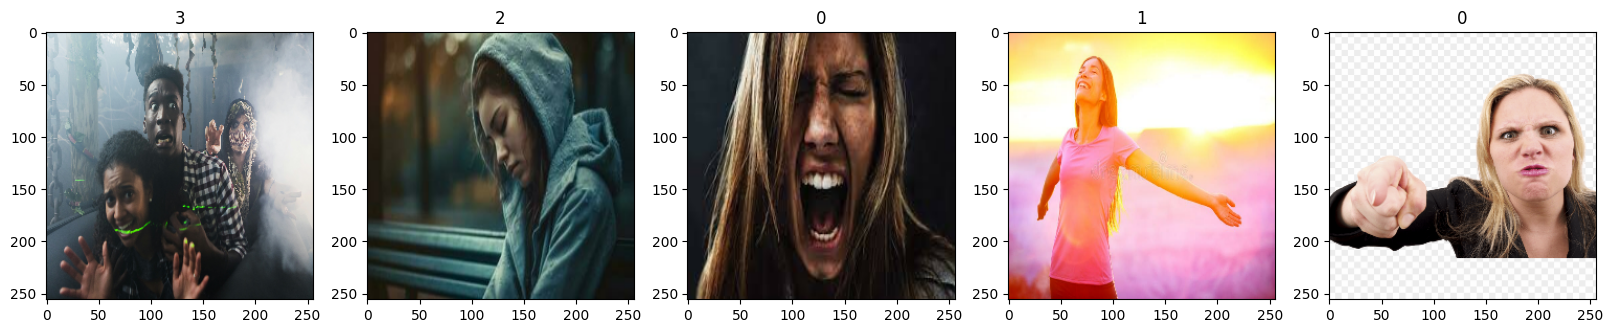

In [23]:
# Checking konsa label kiskaa we are making a plot of first 4 obejcts of the batch
fig,ax = plt.subplots(ncols=5, figsize = (20,20))
for idx,img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

* 0 -> Angry
* 1 -> Happy
* 2 -> Sad
* 3 -> Fear

## Preprocess the data

In [24]:
# Preprocess the data
# Scale the data from (0 to 255) to (0 to 1) by dividing by 255 as the model to generalise faster and produce better results
# Splitting data into train test and validation set

In [25]:
batch[0].max()

255.0

In [26]:
scaled_data = batch[0]/255
scaled_data.max()
#Note we our using a data pipeline and we cant do this everytime we are loading a batch
#We want this to be done on the go and that is why we will use the python's map function with the lambda

1.0

In [27]:
data = data.map(lambda x,y: (x/255, y)) #VERY IMPORTANT!!!
#Make a note of the syntax that x/255 ke around brackets nahi hai..
#While using the lambda function when there are two variables example x,y we have to put brackets around (x,y) only and perform any operations within that

See the various methods that apply to tf.data.Datset api that will be used a lot in the future projects <br>
Link-https://www.tensorflow.org/api_docs/python/tf/data/Dataset

In [28]:
data.as_numpy_iterator().next()[0].min()

0.0

In [29]:
data.as_numpy_iterator().next()[0].max() #Matlab kaam hogaya mast

2024-07-19 14:22:14.629315: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1.0

In [30]:
data_iterator = data.as_numpy_iterator()

In [31]:
batch = data_iterator.next()

2024-07-19 14:22:16.222252: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


In [32]:
batch[0]

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.06666667, 0.07058824, 0.14117648],
         [0.06666667, 0.07058824, 0.14117648]

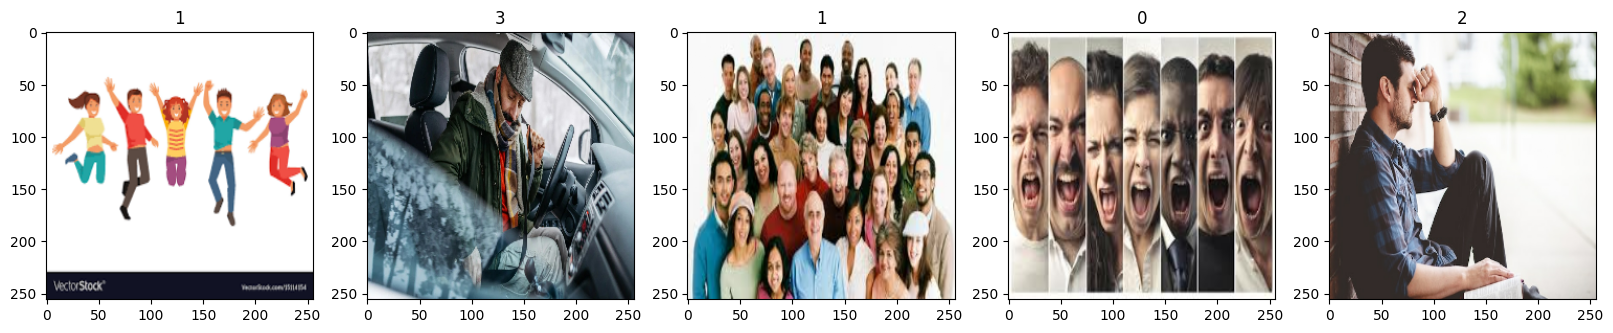

In [33]:
# Checking konsa label kiskaa we are making a plot of first 4 obejcts of the batch
fig,ax = plt.subplots(ncols=5, figsize = (20,20))
for idx,img in enumerate(batch[0][:5]):
    ax[idx].imshow(img) #removed astype(int) here as values are between 0 to 1 toh sab round down hoke 0 hojate hai and we get just a black image
    ax[idx].title.set_text(batch[1][idx])

### Splitting the data

In [34]:
len(data)
#Means we have 16 batches and batch size is 32
#Some maths---
# Total data = 497 files belonging to 4 classes
# so 15*32 < 497 < 16*32
# And that is why we have 15 batches of size 32 and the 16th batch of size 15

16

In [35]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1

In [36]:
train_size+val_size+test_size

16

In [37]:
# We are making use of the skip and take methods in the tf.data.Dataset api mentionned
# take method takes the data
# skip method skips the data
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

## Deep learning model 

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
#Conv2d- extracts relevant spatial features
#Maxpooling layer- Basically extracts important features only by halving the original pixels. It takes the max value in a particular region usually (2,2)
#Flatten- Used to connect the cnn with ann(dense layers) and converts a multidimensional array to a one dimensional array to act as an input to the dense layer
#Dense- Layer where every neuron is connected to every other neuron

In [39]:
model = Sequential()

In [40]:
# arguments- no of filters, pixels of each filter or filter size, no of strides ie kitne pixel se move karega woh 3x3 ka humara block, activation unit used, the input specified for the first convolutional layer
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(4, activation = 'softmax')) #In this last layer for binary classification we have to take 1 as the input and activation as sigmoid

/Users/vinitsorathia/Desktop/Mood/Mood-detection-using-CNN/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
#Note that we use tf.losses.BinaryCrossentropy() for binary classification and categorical_crossentropy for one hot encoded labels..
#Here where the labels itself are numbers,we use sparse_categorical_crossentropy

model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,396 (14.10 MB)

 Trainable params: 3,697,396 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
log_directory = 'logs'

In [44]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_directory)

In [45]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2024-07-19 14:23:06.169576: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.3310 - loss: 1.5611

2024-07-19 14:23:10.006494: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 401ms/step - accuracy: 0.3327 - loss: 1.5526 - val_accuracy: 0.3646 - val_loss: 1.2677
Epoch 2/20


2024-07-19 14:23:11.053405: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.4079 - loss: 1.2652

2024-07-19 14:23:15.129443: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 494ms/step - accuracy: 0.4130 - loss: 1.2638 - val_accuracy: 0.5938 - val_loss: 1.0800
Epoch 3/20
 1/11 ━━━━━━━━━━━━━━━━━━━━ 8s 867ms/step - accuracy: 0.7188 - loss: 0.9855

2024-07-19 14:23:17.117941: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.6048 - loss: 1.0407

2024-07-19 14:23:20.809688: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 442ms/step - accuracy: 0.6045 - loss: 1.0380 - val_accuracy: 0.5833 - val_loss: 0.9145
Epoch 4/20


2024-07-19 14:23:21.783966: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.7140 - loss: 0.7821

2024-07-19 14:23:26.344209: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 442ms/step - accuracy: 0.7118 - loss: 0.7834 - val_accuracy: 0.7604 - val_loss: 0.7126
Epoch 5/20


2024-07-19 14:23:26.712646: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.8019 - loss: 0.6130

2024-07-19 14:23:31.330666: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 454ms/step - accuracy: 0.8021 - loss: 0.6131 - val_accuracy: 0.8438 - val_loss: 0.4633
Epoch 6/20


2024-07-19 14:23:32.399214: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.8973 - loss: 0.3756

2024-07-19 14:23:36.541381: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 416ms/step - accuracy: 0.8969 - loss: 0.3747 - val_accuracy: 0.9062 - val_loss: 0.2883
Epoch 7/20
 2/11 ━━━━━━━━━━━━━━━━━━━━ 5s 578ms/step - accuracy: 0.8906 - loss: 0.2697

2024-07-19 14:23:37.977678: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.8985 - loss: 0.2662

2024-07-19 14:23:40.670660: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 417ms/step - accuracy: 0.8997 - loss: 0.2650 - val_accuracy: 0.9792 - val_loss: 0.1489
Epoch 8/20


2024-07-19 14:23:42.003484: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.9477 - loss: 0.1446

2024-07-19 14:23:46.068847: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 478ms/step - accuracy: 0.9478 - loss: 0.1453 - val_accuracy: 0.9688 - val_loss: 0.1344
Epoch 9/20
 1/11 ━━━━━━━━━━━━━━━━━━━━ 6s 696ms/step - accuracy: 1.0000 - loss: 0.0814

2024-07-19 14:23:48.070375: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.9779 - loss: 0.1117

2024-07-19 14:23:51.063085: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 420ms/step - accuracy: 0.9779 - loss: 0.1111 - val_accuracy: 0.9375 - val_loss: 0.1785
Epoch 10/20


2024-07-19 14:23:52.052950: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - accuracy: 0.9553 - loss: 0.1337

2024-07-19 14:23:56.783628: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 534ms/step - accuracy: 0.9564 - loss: 0.1319 - val_accuracy: 1.0000 - val_loss: 0.0385
Epoch 11/20


2024-07-19 14:23:58.161422: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.9869 - loss: 0.0789

2024-07-19 14:24:02.267729: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 429ms/step - accuracy: 0.9868 - loss: 0.0791 - val_accuracy: 0.9583 - val_loss: 0.1354
Epoch 12/20
 1/11 ━━━━━━━━━━━━━━━━━━━━ 7s 761ms/step - accuracy: 0.9688 - loss: 0.0811

2024-07-19 14:24:03.884919: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.9867 - loss: 0.0473

2024-07-19 14:24:07.364075: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 430ms/step - accuracy: 0.9867 - loss: 0.0475 - val_accuracy: 1.0000 - val_loss: 0.0194
Epoch 13/20


2024-07-19 14:24:08.370979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.9906 - loss: 0.0362

2024-07-19 14:24:12.188658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 442ms/step - accuracy: 0.9906 - loss: 0.0364 - val_accuracy: 1.0000 - val_loss: 0.0433
Epoch 14/20


2024-07-19 14:24:13.272862: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.9943 - loss: 0.0693

2024-07-19 14:24:17.518110: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 433ms/step - accuracy: 0.9945 - loss: 0.0667 - val_accuracy: 0.9896 - val_loss: 0.0196
Epoch 15/20


2024-07-19 14:24:18.971687: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.9930 - loss: 0.0579

2024-07-19 14:24:23.471060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 528ms/step - accuracy: 0.9932 - loss: 0.0561 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 16/20


2024-07-19 14:24:24.933188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.9956 - loss: 0.0198

2024-07-19 14:24:28.761937: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 458ms/step - accuracy: 0.9953 - loss: 0.0210 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 17/20


2024-07-19 14:24:29.944601: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.9957 - loss: 0.0204

2024-07-19 14:24:34.009973: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 455ms/step - accuracy: 0.9958 - loss: 0.0201 - val_accuracy: 1.0000 - val_loss: 0.0051
Epoch 18/20


2024-07-19 14:24:35.155577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.9984 - loss: 0.0118

2024-07-19 14:24:39.233907: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 453ms/step - accuracy: 0.9983 - loss: 0.0124 - val_accuracy: 0.9896 - val_loss: 0.0387
Epoch 19/20


2024-07-19 14:24:40.246679: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.9943 - loss: 0.0309

2024-07-19 14:24:44.461895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 443ms/step - accuracy: 0.9945 - loss: 0.0298 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 20/20
 1/11 ━━━━━━━━━━━━━━━━━━━━ 8s 852ms/step - accuracy: 1.0000 - loss: 0.0025

2024-07-19 14:24:46.404346: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.9948 - loss: 0.0113

2024-07-19 14:24:50.417617: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 500ms/step - accuracy: 0.9945 - loss: 0.0120 - val_accuracy: 1.0000 - val_loss: 0.0029


In [46]:
hist.history

{'accuracy': [0.35227271914482117,
  0.46875,
  0.6022727489471436,
  0.6875,
  0.8039772510528564,
  0.8920454382896423,
  0.9119318127632141,
  0.9488636255264282,
  0.9772727489471436,
  0.96875,
  0.9857954382896423,
  0.9857954382896423,
  0.9914772510528564,
  0.9971590638160706,
  0.9943181872367859,
  0.9914772510528564,
  0.9971590638160706,
  0.9971590638160706,
  0.9971590638160706,
  0.9914772510528564],
 'loss': [1.4587035179138184,
  1.2487858533859253,
  1.009196162223816,
  0.7972126603126526,
  0.6149241924285889,
  0.3652477264404297,
  0.25244802236557007,
  0.153243750333786,
  0.10469638556241989,
  0.11185650527477264,
  0.08066967874765396,
  0.050077173858881,
  0.038720566779375076,
  0.03857123479247093,
  0.03632029518485069,
  0.034429293125867844,
  0.016620900481939316,
  0.01821746863424778,
  0.018563110381364822,
  0.019146839156746864],
 'val_accuracy': [0.3645833432674408,
  0.59375,
  0.5833333134651184,
  0.7604166865348816,
  0.84375,
  0.90625,
  

## Plot performance

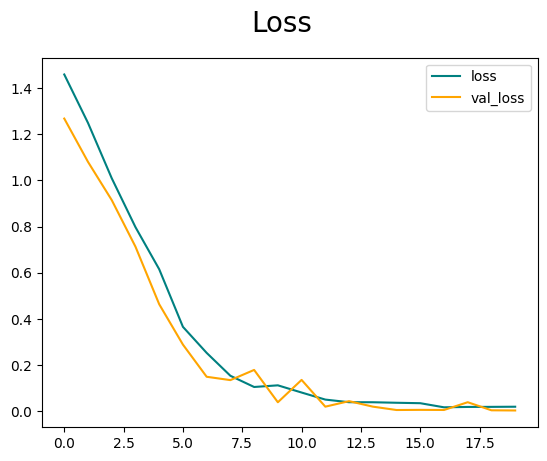

In [47]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label = 'loss')
plt.plot(hist.history['val_loss'], color='orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc="upper right")
plt.show()

#Both decreasing means sab sahi hai
#If loss decreases but val_loss starts increasing means the model is overfitting and might need some changes.

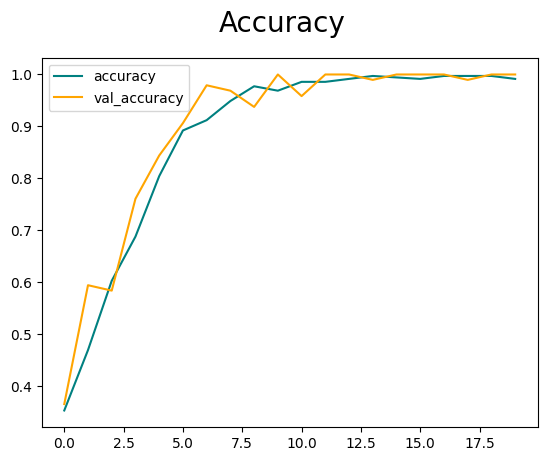

In [48]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc="upper left")
plt.show()

## Evaluation on Test Partition

In [49]:
from tensorflow.keras.metrics import Precision, Recall, Accuracy

In [50]:
pre = Precision()
re = Recall()
acc = Accuracy()

In [51]:
for batch in test.as_numpy_iterator():
    X, y = batch
    ypred = model.predict(X)
    #y
    #ypred
    #[np.argmax(i) for i in ypred]
    pre.update_state(y, [np.argmax(i) for i in ypred])
    re.update_state(y, [np.argmax(i) for i in ypred])
    acc.update_state(y, [np.argmax(i) for i in ypred])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


2024-07-19 14:25:41.186280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


2024-07-19 14:25:41.668502: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [52]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')


Precision: 1.0, Recall: 0.9714285731315613, Accuracy: 0.9795918464660645


In [53]:
li = [[1,2,3],[5,7,2]]
[np.argmax(i) for i in li]

[2, 1]

## Test

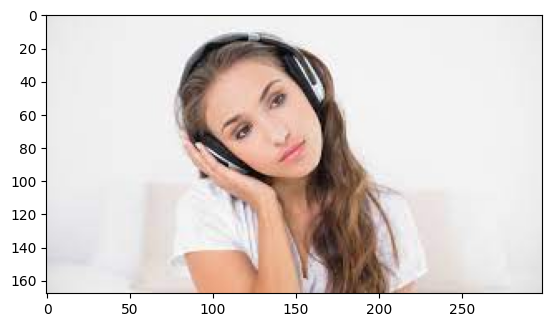

In [54]:
import cv2
img = cv2.imread('sad_test.jpg')
cvt_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(cvt_img)


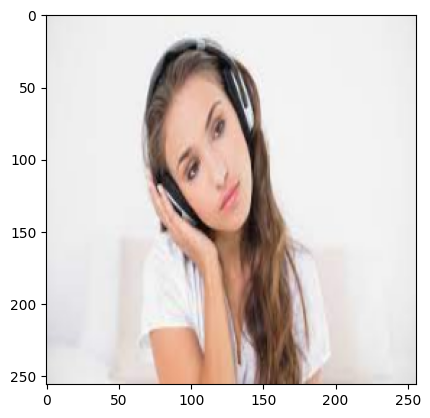

In [55]:
resize = tf.image.resize(cvt_img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [56]:
expanded = np.expand_dims(resize/255,axis = 0)

In [57]:
pred1 = np.argmax(model.predict(expanded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [58]:
pred1 #2 is sad which is correctly predicted

0

In [59]:
#Making a function for the same
def classify(filename):
    img = cv2.imread(filename)
    resized = tf.image.resize(img, (256,256))
    expanded = np.expand_dims(resized/255, 0)
    pred = model.predict(expanded)
    predlabel = np.argmax(pred)
    if(predlabel == 0):
        print('The given image is of a person who is angry')
    elif(predlabel == 1):
        print('The given image is of a person who is happy')
    elif(predlabel == 2):
        print('The given image is of a person who is sad')
    elif(predlabel == 3):
        print('The given image is of a person who is scared')
    cvt_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cvt_img.astype(int))
    plt.show()
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The given image is of a person who is scared


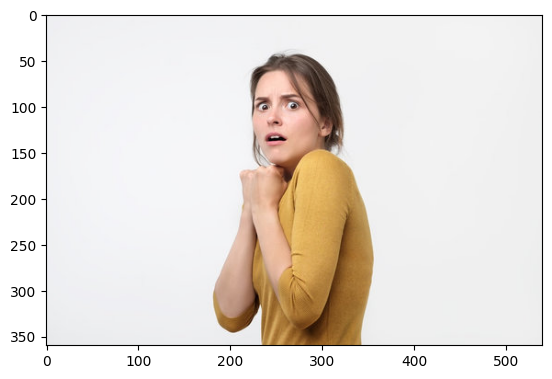

In [62]:
classify('fear_test.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
The given image is of a person who is happy


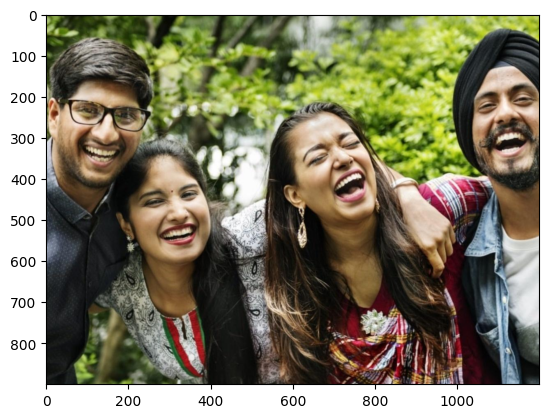

In [63]:
classify('happy_test.jpg')

In [64]:
from tensorflow.keras.models import load_model

In [65]:
model.save(os.path.join('models','moodpredictor.h5'))

In [66]:
new_model = load_model(os.path.join('models','moodpredictor.h5'))

In [69]:
img = cv2.imread('happy_test.jpg')
resized = tf.image.resize(img, (256,256))
expanded = np.expand_dims(resized/255, 0)
pred = new_model.predict(expanded)
predlabel = np.argmax(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [70]:
if(predlabel == 0):
    print('The given image is of a person who is angry')
elif(predlabel == 1):
    print('The given image is of a person who is happy')
elif(predlabel == 2):
    print('The given image is of a person who is sad')
elif(predlabel == 3):
    print('The given image is of a person who is scared')

The given image is of a person who is happy
